In [2]:
import numpy as np
from datasets.dataloader import *

loader,target_loader=get_train_loader("./data/processed/R/","./data/processed/V/")

torch_to_image = transforms.Compose([
    transforms.Normalize(mean=(-1,-1,-1), std=(2,2,2)),  # [-1, 1] to [0, 1]
    transforms.ToPILImage()
])
x=next(iter(loader))
print(x.shape)
if (x.shape)[1]==1:
    generated_images=torch_to_image(torch.cat([x,x,x],1)[0])



#torch_to_image(next(iter(loader)))

torch.Size([8, 1, 512, 512])


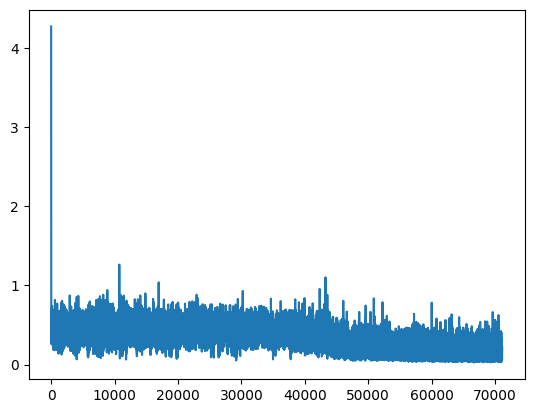

In [11]:
import matplotlib.pyplot as plt
checkpoint=torch.load('./checkpoints/CycleGAN/NonResizig_Gray_100epoch/checkpoint-epoch-90.ckpt')
plt.plot(checkpoint['loss_D_y_hist'])

In [3]:
from PIL import Image
import numpy as np
import glob
import cv2
path=glob.glob("./data/processed/R/*.jpg")
path_V=glob.glob("./generated_images/COS_Histogram_matching//*.jpg")
base_shape=np.array(Image.open(path_V[0])).shape
for pa in path_V:
    im=cv2.imread(pa)
    print(im.shape)
    if np.array(im).shape!=base_shape:
        print("except_size")
        print(pa)
        print(np.array(im).shape)
        


(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V02872.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V02990.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V01358.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V02817.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V03164.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V02050.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V00546.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V03480.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V03374.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./generated_images/COS_Histogram_matching/V00560.jpg
(1240, 2600, 3)
(1240, 2600, 3)
except_size
./

# evaluation dataset making
- 4 randomcrop

In [2]:
from PIL import Image
import numpy as np
import glob
from utils import *
from datasets.dataloader import *
import torchvision.transforms as transforms

path=glob.glob("./data/processed/R/*.jpg")
path_V=glob.glob("./data/processed/V/*.jpg")
loader=get_eval_loader('./generated_images/COS_Histogram_matching',resizing=[1024,2048])
torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])
q=0
for batch in loader:
    for im in batch:
        for i in range(4):
            croped=transforms.RandomCrop(512)(im)
            croped=torch.cat([croped,croped,croped],0)
            croped=torch_to_image(croped)
            #croped.save("./data/for_eval_noncrop/{}.jpg".format(q))
            croped.save("./generated_images/COS_for_eval/{}.jpg".format(q))
            q+=1

Preparing DataLoader for the evaluation phase...


# evaluation 코드 체크용
## FID

In [6]:
# TODO
from models.base_model import BaseGenerator
import torch
from datasets.dataloader import *
import os
import shutil
from metric.fid import *
def generate_test_sample(model,dataloader,save_path,device=torch.device('cpu')):
    torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    k=0
    for batch in dataloader:
        for im in batch:
            croped=transforms.CenterCrop(512)(im)
            sample=model(croped.unsqueeze(0).to(device))
            sample=torch.cat([sample,sample,sample],1)
            sample=torch_to_image(sample[0])
            sample.save(os.path.join(save_path,(str(k)+'.jpg')))
            k+=1
def calculate_fid(model,data_loader,save_path,base_path ,img_size=256,batch_size=50,device=torch.device('cpu')):
    # after generate sample and calculate fid
    
    generate_test_sample(model,data_loader,save_path,device=device)
    fid=calculate_fid_given_paths([base_path,save_path],img_size,batch_size)
    shutil.rmtree(save_path)
    return fid

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model=BaseGenerator(n_res=2).to(device)
#new_img.save("./generated_images/CycleGAN_Sample/{}.jpg".format(k))
eval_loader=get_eval_loader(root="./data/processed/V", batch_size=4, shuffle=False)

calculate_fid(model,eval_loader,os.path.join("./generated_images","test"),"./data/for_eval_noncrop",device=device)

cuda
Preparing DataLoader for the evaluation phase...
Calculating FID given paths ./data/for_eval_noncrop and ./generated_images/test...


/home/poong/yes/envs/jaepoong/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/poong/yes/envs/jaepoong/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


cuda


100%|██████████| 72/72 [00:05<00:00, 12.86it/s]


312.8881045106264

In [23]:
import os
import shutil
os.mkdir(os.path.join("./generated_images","test"))
shutil.rmtree(os.path.join("./generated_images","test"))

In [4]:
from models.base_model import BaseGenerator
import torch
from datasets.dataloader import *
import os
import shutil
from metric.fid import *

def generate_test_sample(model,dataloader,save_path,device=torch.device('cpu')):
    torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    k=0
    for batch in dataloader:
        for im in batch:
            croped=transforms.CenterCrop(512)(im)
            sample=model(croped.unsqueeze(0).to(device))
            sample=torch.cat([sample,sample,sample],1)
            sample=torch_to_image(sample[0])
            sample.save(os.path.join(save_path,(str(k)+'.jpg')))
            k+=1
def calculate_fid(model,data_loader,save_path,base_path ,img_size=256,batch_size=50,device=torch.device('cpu')):
    # after generate sample and calculate fid
    
    generate_test_sample(model,data_loader,save_path,device=device)
    fid=calculate_fid_given_paths([base_path,save_path],img_size,batch_size)
    shutil.rmtree(save_path)
    return fid

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model=BaseGenerator(n_res=2).to(device)
#new_img.save("./generated_images/CycleGAN_Sample/{}.jpg".format(k))
eval_loader=get_eval_loader(root="./data/processed/V", batch_size=4, shuffle=False)

fid=calculate_fid_given_paths(["./generated_images/test","./data/for_eval_noncrop"])
fid

cuda
Preparing DataLoader for the evaluation phase...
Calculating FID given paths ./generated_images/test and ./data/for_eval_noncrop...
cuda


100%|██████████| 81/81 [00:05<00:00, 15.35it/s]


272.5836284341297

In [4]:
from models.base_model import BaseGenerator
import torch
from datasets.dataloader import *
import os
import shutil
from metric.fid import *
fid=calculate_fid_given_paths(["./data/for_eval","./generated_images/COS_for_eval"])
fid

Calculating FID given paths ./data/for_eval and ./generated_images/COS_for_eval...
cuda


100%|██████████| 138/138 [00:08<00:00, 16.47it/s]


63.5988264893021

## PR

In [5]:
from models.base_model import BaseGenerator
import torch
from datasets.dataloader import *
import os
import shutil
from metric.pr import *

def calculate_pr(model,dataloader,save_path,path_real,batch_size=50,k=3,num_samples=5000,device=torch.device('cpu')):
    #generate_test_sample(model,dataloader,save_path,device)
    ipr=IPR(batch_size,k,num_samples)
    
    with torch.no_grad():
        ipr.compute_manifold(path_real)
        precision,recall=ipr.precision_and_recall(save_path)
    shutil.rmtree(save_path)
    return precision,recall
        
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model=BaseGenerator(n_res=2).to(device)
#new_img.save("./generated_images/CycleGAN_Sample/{}.jpg".format(k))
eval_loader=get_eval_loader(root="./data/processed/V", batch_size=4, shuffle=False)

#calculate_pr(model,eval_loader,os.path.join("./generated_images","test"),"./data/for_eval_noncrop",device=device)
calculate_pr(model,eval_loader,"./data/for_eval","./generated_images/SSIM_Histogram_matching",device=device)

cuda
Preparing DataLoader for the evaluation phase...
loading vgg16 for improved precision and recall...

/home/poong/yes/envs/jaepoong/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/poong/yes/envs/jaepoong/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


done


extracting features of 3554 images: 100%|██████████| 72/72 [00:22<00:00,  3.25it/s]


AssertionError: call IPR.compute_manifold_ref() first

: 

In [1]:
from models.base_model import *
import torch.nn as nn
from models import load_Generator,load_Discriminator


import torch
noise=torch.normal(0,1,size=(1,1,512,512)).to('cuda')
model=AttU_Net().to('cuda')
model(noise).shape

torch.Size([1, 1, 512, 512])

In [2]:
from torchsummary import summary as summary
summary(model,(1,512,512))

IndexError: tuple index out of range

In [2]:
from models.block import *

class Generator_Mod(nn.Module):
    def __init__(self,n_res=4,use_bias=False):
        super().__init__()
        
        self.n_res=n_res
        self.use_bias=use_bias
        self.down_sampling=nn.Sequential(
            nn.Conv2d(3,64,kernel_size=7,stride=1,padding=0,bias=use_bias),
            nn.BatchNorm2d(64,affine=True),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(64,128,kernel_size=3,stride=2,padding=3,bias=use_bias),
            nn.BatchNorm2d(128,affine=True),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(128,256,kernel_size=3,stride=2,padding=1,bias=use_bias),
            nn.BatchNorm2d(256,affine=True),
            nn.LeakyReLU(0.2,inplace=True),
        )
        
        res_block=[]
        for i in range(n_res):
            res_block.append(ResBlk(256,256,normalize=True,use_bias=self.use_bias))
        self.res_block=nn.Sequential(*res_block)
        
        self.up_sampling = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=0, output_padding=1, bias=use_bias),
            nn.BatchNorm2d(128,affine=True),
            nn.LeakyReLU(0.2,inplace=True),

            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=0, output_padding=1, bias=use_bias),
            nn.BatchNorm2d(64,affine=True),
            nn.LeakyReLU(0.2,inplace=True),

            nn.Conv2d(64, 3, kernel_size=7, stride=1, padding=0, bias=use_bias),
            nn.Tanh()
        )
    
    def forward(self,input):
        x=self.down_sampling(input)
        x=self.res_block(x)
        out=self.up_sampling(x)
        return out

In [1]:
import torch.nn as nn
from models.base_model import *

import torch
noise=torch.normal(0,1,size=(1,1,512,512))
model=BaseGenerator()
model=BaseDiscriminator()
model(noise).shape

torch.Size([1, 1, 27, 27])

In [1]:
from models.base_model import *
import torch
noise=torch.normal(0,1,size=(1,1,512,512)).to('cuda')
D=BaseDiscriminator().to('cuda')
a=D(noise)


In [7]:
torch.mean(a).item()

-0.21616755425930023

In [2]:
from torchsummary import summary
summary(D,(1, 512, 512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 510, 510]             576
    InstanceNorm2d-2         [-1, 64, 510, 510]               0
              ReLU-3         [-1, 64, 510, 510]               0
            Conv2d-4         [-1, 64, 508, 508]          36,864
    InstanceNorm2d-5         [-1, 64, 508, 508]               0
              ReLU-6         [-1, 64, 508, 508]               0
            Conv2d-7         [-1, 64, 253, 253]          36,864
    InstanceNorm2d-8         [-1, 64, 253, 253]               0
              ReLU-9         [-1, 64, 253, 253]               0
           Conv2d-10         [-1, 64, 251, 251]          36,864
   InstanceNorm2d-11         [-1, 64, 251, 251]               0
             ReLU-12         [-1, 64, 251, 251]               0
           Conv2d-13        [-1, 128, 125, 125]          73,728
   InstanceNorm2d-14        [-1, 128, 1

In [16]:
import numpy as np
from datasets.dataloader import *
from models.base_model import *
import torch
from PIL import Image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
eval_loader=get_eval_loader(root="./data/processed/V", batch_size=1, shuffle=False)

model=BaseGenerator(n_res=6).to(device)
checkpoint=torch.load('./checkpoints/CycleGAN/NonResizig_Gray_100epoch/checkpoint-epoch-30.ckpt')
model.load_state_dict(checkpoint['F_state_dict'])
torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])
k=0
for im in eval_loader:
    new_img=Image.new('RGB',(im.shape[3],im.shape[2]))
    for i,sub_image in enumerate(im.chunk(4,dim=2)):
        for j,sub_im in enumerate(sub_image.chunk(4,dim=3)):
            result=model(sub_im.to(device))
            result=torch.cat([result,result,result],1)
            result=torch_to_image(result[0])
            new_img.paste(result,(j*sub_im.shape[3],i*sub_im.shape[2]))
    new_img.save("./generated_images/CycleGAN_Sample/{}.jpg".format(k))
    k+=1
    
        

Preparing DataLoader for the evaluation phase...


RuntimeError: Error(s) in loading state_dict for BaseGenerator:
	size mismatch for up_sampling.0.weight: copying a param with shape torch.Size([256, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 128, 5, 5]).

In [19]:
import numpy as np
from datasets.dataloader import *
from models.base_model import *
import torch
from PIL import Image
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
eval_loader=get_eval_loader(root="./data/processed/V", batch_size=1, shuffle=False)

for im in eval_loader:
    for

model=BaseGenerator(n_res=6).to(device)
#checkpoint=torch.load('./checkpoints/CycleGAN/NonResizig_Gray_100epoch/checkpoint-epoch-30.ckpt')
#model.load_state_dict(checkpoint['F_state_dict'])
torch_to_image = transforms.Compose([
        transforms.Normalize(mean=(-1, -1, -1), std=(2, 2, 2)),  # [-1, 1] to [0, 1]
        transforms.ToPILImage()
    ])

Preparing DataLoader for the evaluation phase...


In [32]:
result=model(sub_images[3].chunk(4,dim=3)[2])
result=torch.cat([result,result,result],1)

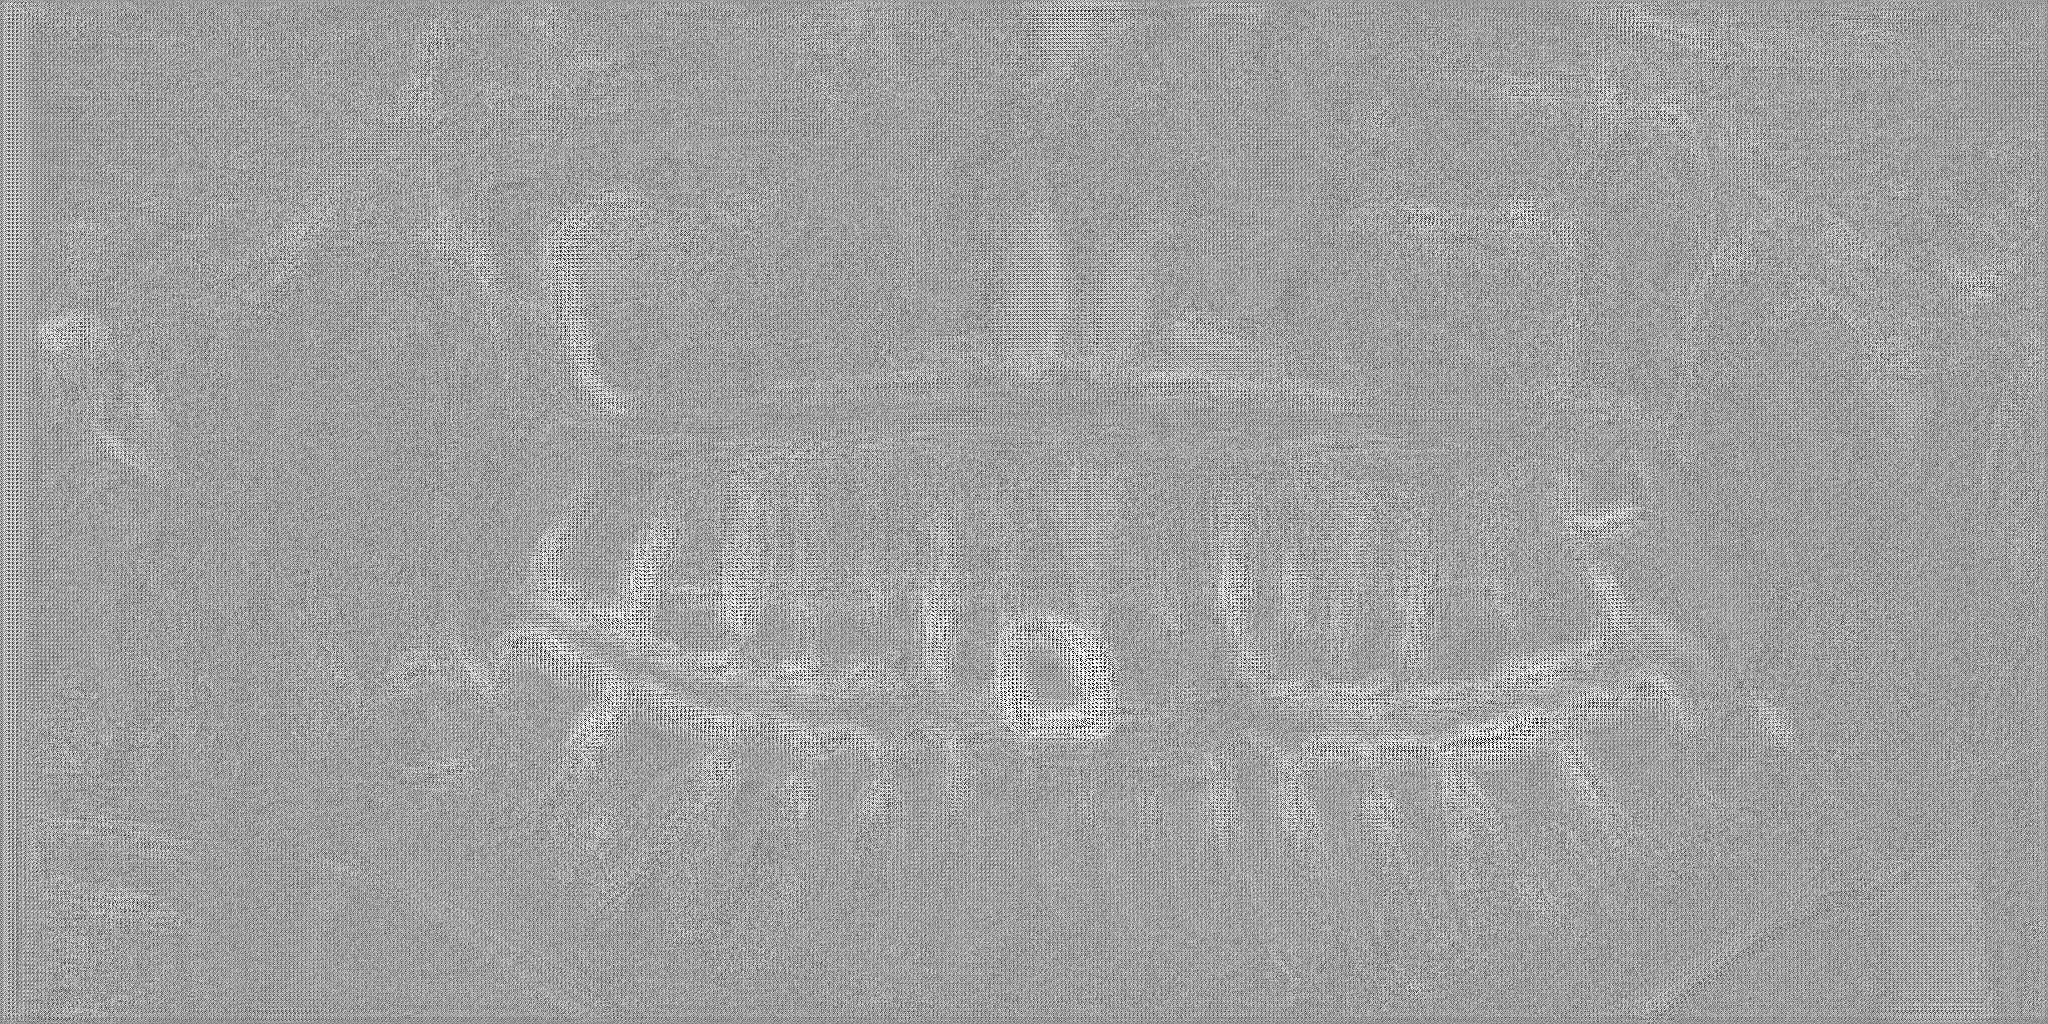

In [30]:
im=next(iter(eval_loader))
im=model(im.to(device))[0]
torch_to_image(torch.cat([im,im,im],axis=0))

In [24]:
result.shape

torch.Size([1, 3, 310, 650])

In [46]:
im[0,0,:,:].shape

torch.Size([1240, 2600])

In [69]:
new_img=Image.new('RGB',(im.shape[3],im.shape[2]))

In [79]:
new_img.paste(result,(1*sub_im.shape[3],1*sub_im.shape[2]))

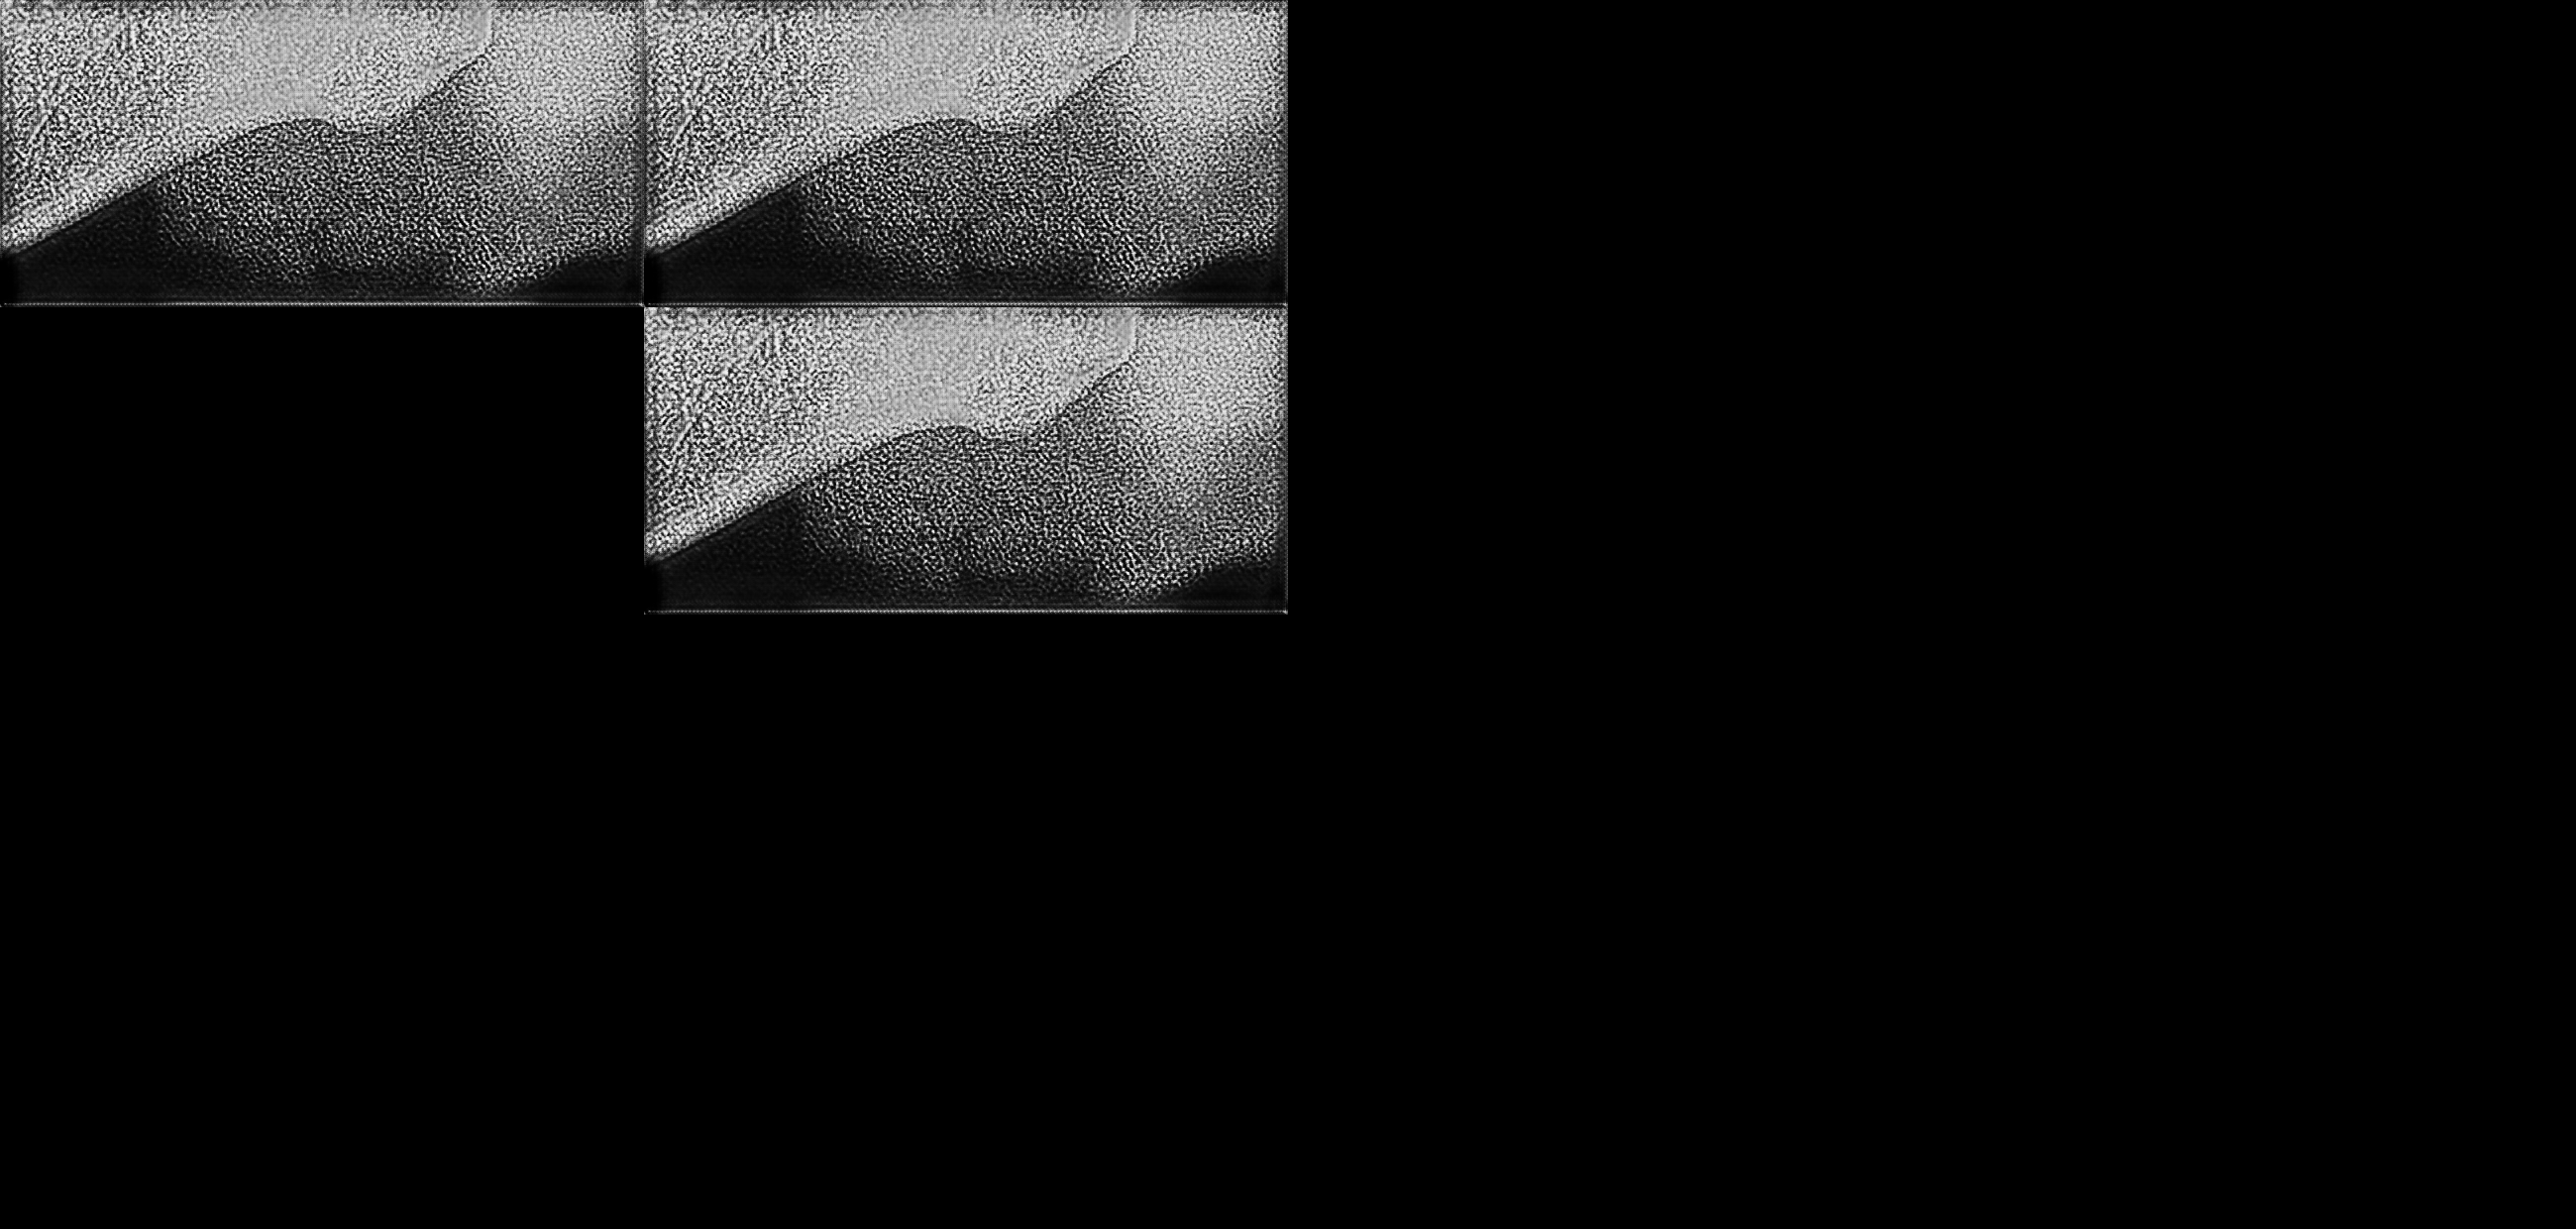

In [80]:
display(new_img)

In [68]:
im.shape[3]

2600

In [75]:
sub_im.shape

torch.Size([1, 1, 310, 650])

In [76]:
sub_image.shape

torch.Size([1, 1, 310, 2600])